In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
# import dataprep.eda.create_report as report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#feature_df=pd.read_csv(r'C:\Users\ayish\GuviProjects\Final Project\Features_data_set (1).csv')
sales_df=pd.read_csv(r'C:\Users\ayish\GuviProjects\Final Project\sales_data_set (1).csv')
stores_df=pd.read_csv(r'C:\Users\ayish\GuviProjects\Final Project\stores_data_set.csv')

In [20]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
sales_df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [3]:
from functools import reduce

combined_df=reduce(lambda x,y: pd.merge(x,y, on='Store',how='outer'),[sales_df,stores_df])

In [8]:
combined_df.shape

(421570, 7)

In [22]:
combined_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


In [4]:
combined_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
dtype: object

In [5]:
combined_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [6]:
combined_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
dtype: object

In [7]:
combined_df['IsHoliday'].unique()

array([False,  True])

In [8]:
combined_df['IsHoliday']=combined_df['IsHoliday'].map({False:0,True:1})
combined_df['Type']=OrdinalEncoder().fit_transform(combined_df[['Type']])

In [9]:
combined_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,0,0.0,151315
1,1,1,12/02/2010,46039.49,1,0.0,151315
2,1,1,19/02/2010,41595.55,0,0.0,151315
3,1,1,26/02/2010,19403.54,0,0.0,151315
4,1,1,05/03/2010,21827.90,0,0.0,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,1.0,118221
421566,45,98,05/10/2012,628.10,0,1.0,118221
421567,45,98,12/10/2012,1061.02,0,1.0,118221
421568,45,98,19/10/2012,760.01,0,1.0,118221


In [11]:
combined_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')

<Axes: >

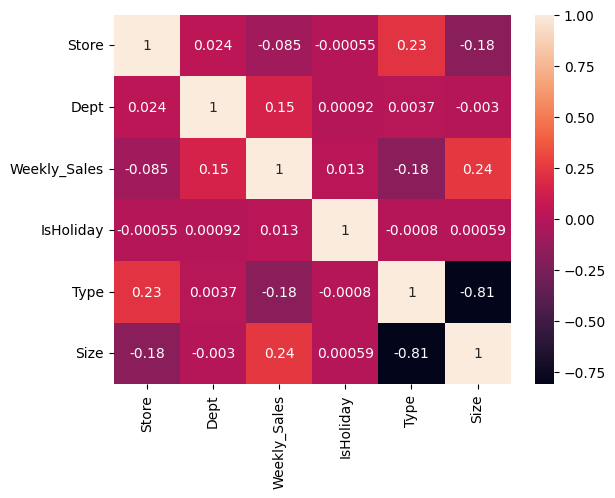

In [12]:
col=['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size']
df_heatmap=combined_df[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [30]:
df=combined_df.copy()
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,0,0.0,151315
1,1,1,12/02/2010,46039.49,1,0.0,151315
2,1,1,19/02/2010,41595.55,0,0.0,151315
3,1,1,26/02/2010,19403.54,0,0.0,151315
4,1,1,05/03/2010,21827.90,0,0.0,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0,1.0,118221
421566,45,98,05/10/2012,628.10,0,1.0,118221
421567,45,98,12/10/2012,1061.02,0,1.0,118221
421568,45,98,19/10/2012,760.01,0,1.0,118221


In [31]:
df1=df.drop(columns=['Type','Size'], axis=1)
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,0
1,1,1,12/02/2010,46039.49,1
2,1,1,19/02/2010,41595.55,0
3,1,1,26/02/2010,19403.54,0
4,1,1,05/03/2010,21827.90,0
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0
421566,45,98,05/10/2012,628.10,0
421567,45,98,12/10/2012,1061.02,0
421568,45,98,19/10/2012,760.01,0


In [25]:
df1.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [38]:
df1['Date']=pd.to_datetime(df1['Date']).dt.strftime('%d.%m.%Y')
#df1['Day']=df1['Date'].dt.day
#df1['month']=df1['Date'].dt.month
#df1['year']=df1['Date'].dt.year
#df4['Date_difference']=(df4['delivery date_1'] - df4['item_date_1']).apply(lambda x: x.days)
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Day,month,year
0,1,1,NaN,24924.50,0,NaN,NaN,NaN
1,1,1,NaN,46039.49,1,NaN,NaN,NaN
2,1,1,NaN,41595.55,0,NaN,NaN,NaN
3,1,1,NaN,19403.54,0,NaN,NaN,NaN
4,1,1,NaN,21827.90,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
421565,45,98,NaN,508.37,0,NaN,NaN,NaN
421566,45,98,NaN,628.10,0,NaN,NaN,NaN
421567,45,98,NaN,1061.02,0,NaN,NaN,NaN
421568,45,98,NaN,760.01,0,NaN,NaN,NaN
